In [57]:
from pyspark import SparkContext
from pyspark.sql import SQLContext
from pyspark.sql.types import *
sqlContext = SQLContext(sc)

In [58]:
df = sqlContext
    .read.format("com.databricks.spark.csv")
    .option("header", "true")
    .option("inferschema", "true")
    .option("mode", "DROPMALFORMED")
    .load("/home/training/Desktop/diagnoses.csv")

In [59]:
df1 = sqlContext
    .read.format("com.databricks.spark.csv")
    .option("header", "true")
    .option("inferschema", "true")
    .option("mode", "DROPMALFORMED")
    .load("/home/training/Desktop/hearing_evaluation.csv")

In [60]:
df2= sqlContext
    .read.format("com.databricks.spark.csv")
    .option("header", "true")
    .option("inferschema", "true")
    .option("mode", "DROPMALFORMED")
    .load("/home/training/Desktop/imaging.csv")

In [100]:
df.head(10)

,patient_id,diagnosis_code,diagnosis_age
0,00008RINR,315.350000,3.867372
1,00008RINR,333.100000,3.269294
2,00008RINR,372.140000,2.436191
3,00008RINR,375.200000,3.425355
4,00008RINR,375.220000,3.148826
5,00008RINR,375.560000,3.027580
6,00008RINR,380.400000,3.870110
7,00008RINR,381.300000,1.966112
8,00008RINR,381.400000,2.882471
9,00008RINR,381.810000,2.149552


In [67]:
df1.head(10)

,patient_id,evaluation_age,severity_of_hearing_loss,unilateral_or_bilateral,has_conductive_hearing_loss,has_sensorineural_hearing_loss
0,000JE5P7L,3.381548,Normal,Insufficient Data,f,f
1,001M87HBZ,5.191287,Normal,Insufficient Data,t,f
2,001M87HBZ,8.243763,Mild,Insufficient Data,t,f
3,002ANH0GH,7.355440,Normal,Normal,f,f
4,002ANH0GH,7.380081,Normal,Insufficient Data,f,f
5,005HXCYFF,4.267107,Normal,Insufficient Data,f,f
6,00B0OT59S,5.987728,Moderate,Insufficient Data,t,t
7,00BGN5YV7,4.349244,Normal,Insufficient Data,f,f
8,00F1S17X1,4.464236,Normal,Insufficient Data,f,f
9,00HQAUUEY,12.723302,Moderate,Bilateral,t,t


In [68]:
(df1['severity_of_hearing_loss'].value_counts())

Normal               31092
Mild                  9887
Moderate              3777
Moderately Severe     2023
Slight                1619
Profound               323
Severe                 229
Insufficient Data       57
Name: severity_of_hearing_loss, dtype: int64

In [73]:
df1.head(10)

,patient_id,evaluation_age,severity_of_hearing_loss,unilateral_or_bilateral,has_conductive_hearing_loss,has_sensorineural_hearing_loss
0,000JE5P7L,3.381548,Normal,Insufficient Data,f,f
1,001M87HBZ,5.191287,Normal,Insufficient Data,t,f
2,001M87HBZ,8.243763,Mild,Insufficient Data,t,f
3,002ANH0GH,7.355440,Normal,Normal,f,f
4,002ANH0GH,7.380081,Normal,Insufficient Data,f,f
5,005HXCYFF,4.267107,Normal,Insufficient Data,f,f
6,00B0OT59S,5.987728,Moderate,Insufficient Data,t,t
7,00BGN5YV7,4.349244,Normal,Insufficient Data,f,f
8,00F1S17X1,4.464236,Normal,Insufficient Data,f,f
9,00HQAUUEY,12.723302,Moderate,Bilateral,t,t


In [102]:
df2.head(10)

,patient_id,imaging_age,modality
0,0263DNQG8,0.078671,CT
1,02AQQ4CLC,5.473292,MR
2,02AQQ4CLC,5.582517,MR
3,02AQQ4CLC,5.727917,MR
4,03IZS1W0Q,2.334889,MR
5,03L1A3ZBB,2.630583,CT
6,04T2TBJU0,8.112344,CT
7,05S8KKZXZ,2.031822,CT
8,066ERGFDX,0.251160,MR
9,074GMTQ9X,8.002827,MR


### A diagnosis (i.e. a diagnosis code) can be assigned to a patient directly at the time of a hearing evaluation. List the top 5 most common diagnosis codes given to patients at such a point in time along with their frequencies.

In [103]:
df['diagnosis_code'].value_counts()[:5]

389.900000    85844
382.900000    57055
V20.2         45568
381.810000    43537
465.900000    40315
Name: diagnosis_code, dtype: int64

In [78]:
df4= pd.merge(df,df2,on='patient_id')

In [79]:
df4.head(10)

,patient_id,diagnosis_code,diagnosis_age,imaging_age,modality
0,0263DNQG8,388.400000,0.067720,0.078671,CT
1,0263DNQG8,389.000000,0.067720,0.078671,CT
2,0263DNQG8,389.150000,0.067720,0.078671,CT
3,0263DNQG8,389.900000,0.067720,0.078671,CT
4,0263DNQG8,744.300000,0.067720,0.078671,CT
5,0263DNQG8,V72.19,0.067720,0.078671,CT
6,02AQQ4CLC,190.500000,10.027428,5.473292,MR
7,02AQQ4CLC,190.500000,10.027428,5.582517,MR
8,02AQQ4CLC,190.500000,10.027428,5.727917,MR
9,02AQQ4CLC,253.300000,10.027428,5.473292,MR


#### A diagnosis (i.e. a diagnosis code) can be assigned to a patient directly at the time of a hearing evaluation. List the top 5 most common diagnosis codes given to patients at such a point in time along with their frequencies.

In [80]:
g= df4.groupby(['diagnosis_code'])
g=g.filter(lambda x: x['patient_id'].count()>=1)
g=g.loc[:,['diagnosis_code','patient_id']]
g=g.groupby(['diagnosis_code']).count()
g.sort_values(by=['patient_id'],ascending=False)[:5]

,patient_id
diagnosis_code,
389.900000,1979
V72.19,1773
381.810000,1029
389.100000,1020
389.180000,995


##### In an effort to check that their dataset is `sensible', the client would like to extract the highest number of diagnoses assigned to a single patient. (Both the patient ID and the number of diagnoses need to be included).

In [81]:
g1= df4.groupby(['patient_id'])
g1=g1.filter(lambda x: x['diagnosis_code'].count()>=1)
g1=g1.loc[:,['patient_id','diagnosis_code']]
g1=g1.groupby(['patient_id']).count()
g1['diagnosis_code']
g1.rename(columns = {'diagnosis_code':'Number of diagnosis'}, inplace = True)
g1.sort_values(by=['Number of diagnosis'],ascending=False)

,Number of diagnosis
patient_id,
I9K54P60Z,1472
7LYRM6KWN,833
5SVMNGUNN,700
E2EHSR5TI,572
7QPYO7Y20,539
...,...
QZ5CAWJZU,1
BIKTJGRPH,1
BMOUFYMYD,1


#### A hearing problem is represented in the data as a patient's  everity of Hearing Loss" being one of the following values: Slight, Mild, Moderate, Moderately Severe, Severe, or Profound. The client is interested in the total number of (dierent) people with a hearing problem in comparison to the total number of people who have had a hearing evaluation (both numbers should be stated separately, as well as the % diagnosed having a hearing problem).

In [82]:
event_dictionary ={'Normal' : 1, 'Mild' : 1, 'Moderate' : 1,'Moderately Severe ':1,'Slight':1,'Profound':1,'Severe':1,'Insufficient Data':1} 

df1['values'] = df1['severity_of_hearing_loss'].map(event_dictionary) 

In [83]:
df1['values'].value_counts()

1.0    46984
Name: values, dtype: int64

In [84]:
z= len(df1)

In [85]:
df1.columns

Index(['patient_id', 'evaluation_age', 'severity_of_hearing_loss',
       'unilateral_or_bilateral', 'has_conductive_hearing_loss',
       'has_sensorineural_hearing_loss', 'values'],
      dtype='object')

In [86]:
df11 = df1.drop_duplicates(subset='patient_id', keep="first")
y = len(df11)
y

33891

In [87]:
(df1['severity_of_hearing_loss'].value_counts())
y1= (df1['severity_of_hearing_loss'].value_counts())[-2]
y1

229

In [88]:
(y1/y)*100

0.6756956124044732

In [89]:
df4 = pd.DataFrame({'#Prople having problems': [y1], '#of people with hearing evaluation': [y],'%of the people having problem':[(y1/y)*100]})
df4

,#Prople having problems,#of people with hearing evaluation,%of the people having problem
0,229,33891,0.675696


In [90]:
df5= pd.merge(df,df2,on='patient_id')

In [91]:
df1.head(10)

,patient_id,evaluation_age,severity_of_hearing_loss,unilateral_or_bilateral,has_conductive_hearing_loss,has_sensorineural_hearing_loss,values
0,000JE5P7L,3.381548,Normal,Insufficient Data,f,f,1.0
1,001M87HBZ,5.191287,Normal,Insufficient Data,t,f,1.0
2,001M87HBZ,8.243763,Mild,Insufficient Data,t,f,1.0
3,002ANH0GH,7.355440,Normal,Normal,f,f,1.0
4,002ANH0GH,7.380081,Normal,Insufficient Data,f,f,1.0
5,005HXCYFF,4.267107,Normal,Insufficient Data,f,f,1.0
6,00B0OT59S,5.987728,Moderate,Insufficient Data,t,t,1.0
7,00BGN5YV7,4.349244,Normal,Insufficient Data,f,f,1.0
8,00F1S17X1,4.464236,Normal,Insufficient Data,f,f,1.0
9,00HQAUUEY,12.723302,Moderate,Bilateral,t,t,1.0


In [92]:
df4.head(10)

,#Prople having problems,#of people with hearing evaluation,%of the people having problem
0,229,33891,0.675696


#### Looking specifially at CT imaging, the client would like to know the year group (i.e. you will need to group the ages of encounter into years) which is given the greatest number of CTs.

In [95]:
df6= pd.merge(df,df2,on='patient_id')

In [98]:
df5=df6.loc[df6['modality'] == 'CT']
df5

,patient_id,diagnosis_code,diagnosis_age,imaging_age,modality
0,0263DNQG8,388.400000,0.067720,0.078671,CT
1,0263DNQG8,389.000000,0.067720,0.078671,CT
2,0263DNQG8,389.150000,0.067720,0.078671,CT
3,0263DNQG8,389.900000,0.067720,0.078671,CT
4,0263DNQG8,744.300000,0.067720,0.078671,CT
...,...,...,...,...,...
70965,WLMMGAIN5,389.050000,14.392211,14.258053,CT
70966,WLMMGAIN5,389.050000,14.392211,14.414114,CT
70967,WLMMGAIN5,V72.19,14.216985,9.551356,CT
70968,WLMMGAIN5,V72.19,14.216985,14.258053,CT


(array([ 4910.,  5840.,  3490., 11315.,  6842.,  4829.,  1400.,   305.,
           59.,    24.]),
 array([2.00980151e-03, 3.22627344e+00, 6.45053707e+00, 9.67480070e+00,
        1.28990643e+01, 1.61233280e+01, 1.93475916e+01, 2.25718552e+01,
        2.57961189e+01, 2.90203825e+01, 3.22446461e+01]),
 <a list of 10 Patch objects>)

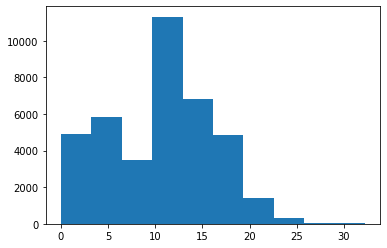

In [99]:
import matplotlib.pyplot as plt
plt.hist(df5['diagnosis_age'], bins=10)
